## Data Extraction

In [ ]:
# !kaggle datasets download -d moltean/fruits

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [1]:
## mounting google drive from colabs
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [1]:
%mkdir dataset

In [ ]:
%mkdir dataset/train
%mkdir dataset/test

In [2]:
## Unzip dataset

import shutil

filename = "fruit-dataset.zip"
extract_dir = "dataset"
archive_format = "zip"
 
# Unpack the archive file
shutil.unpack_archive(filename, extract_dir, archive_format)
print("Archive file unpacked successfully.")

Archive file unpacked successfully.


## Import the library

In [37]:
from os import getcwd
import tensorflow_hub as hub
# from fastai import *
# from fastai.vision import *
# from fastai.metrics import error_rate

## Data processing

In [1]:
#Define the directory
root_dir="dataset"
training="dataset/train"
testing="dataset/test"

#training set sirectory
train_set_apple = "dataset/train/apple"
train_set_banana = "dataset/train/banana"
train_set_mango = "dataset/train/mango"
train_set_grape = "dataset/train/grape"
train_set_orange = "dataset/train/orange"

#testing set sirectory
test_set_apple = "dataset/test/apple"
test_set_banana = "dataset/test/banana"
test_set_grape = "dataset/test/grape"
test_set_orange = "dataset/test/orange"
test_set_mango = "dataset/test/mango"

In [2]:
import os

In [9]:
os.mkdir(train_set_apple)
os.mkdir(train_set_banana)
os.mkdir(train_set_mango)
os.mkdir(train_set_grape)
os.mkdir(train_set_orange)

os.mkdir(test_set_apple)
os.mkdir(test_set_banana)
os.mkdir(test_set_grape)
os.mkdir(test_set_orange)
os.mkdir(test_set_mango)

In [16]:
apple_dir = '/content/gdrive/MyDrive/datasets/fruit-262/apple'
banana_dir = '/content/gdrive/MyDrive/datasets/fruit-262/banana'
mango_dir = '/content/gdrive/MyDrive/datasets/fruit-262/mango'
grape_dir = '/content/gdrive/MyDrive/datasets/fruit-262/grape'
orange_dir = '/content/gdrive/MyDrive/datasets/fruit-262/orange'

from sklearn.model_selection import train_test_split
train_apple, val_apple = train_test_split(os.listdir(apple_dir), test_size=0.2)
train_banana, val_banana = train_test_split(os.listdir(banana_dir), test_size=0.2)
train_mango, val_mango = train_test_split(os.listdir(mango_dir), test_size=0.2)
train_grape, val_grape = train_test_split(os.listdir(grape_dir), test_size=0.2)
train_orange, val_orange = train_test_split(os.listdir(orange_dir), test_size=0.2)

len(train_apple), len(val_apple)

(962, 241)

In [3]:
os.listdir(training)

['apple', 'banana', 'grape', 'mango', 'orange']

In [32]:
from shutil import copyfile

# memasukan data ke direktori train dan val
for i in train_apple:
    shutil.copy(os.path.join(apple_dir, i), os.path.join(train_set_apple, i))
for i in val_apple:
    shutil.copy(os.path.join(apple_dir, i), os.path.join(test_set_apple, i))

for i in train_banana:
    shutil.copy(os.path.join(banana_dir, i), os.path.join(train_set_banana, i))
for i in val_banana:
    shutil.copy(os.path.join(banana_dir, i), os.path.join(test_set_banana, i))

for i in train_mango:
    shutil.copy(os.path.join(mango_dir, i), os.path.join(train_set_mango, i))
for i in val_mango:
    shutil.copy(os.path.join(mango_dir, i), os.path.join(test_set_mango, i))

for i in train_grape:
    shutil.copy(os.path.join(grape_dir, i), os.path.join(train_set_grape, i))
for i in val_grape:
    shutil.copy(os.path.join(grape_dir, i), os.path.join(test_set_grape, i))

for i in train_orange:
    shutil.copy(os.path.join(orange_dir, i), os.path.join(train_set_orange, i))
for i in val_orange:
    shutil.copy(os.path.join(orange_dir, i), os.path.join(test_set_orange, i))

In [4]:
#Test image in 5 classes
print(len(os.listdir(train_set_apple)), len(os.listdir(test_set_apple)))
print(len(os.listdir(train_set_banana)), len(os.listdir(test_set_apple)))
print(len(os.listdir(train_set_grape)), len(os.listdir(test_set_apple)))
print(len(os.listdir(train_set_mango)), len(os.listdir(test_set_apple)))
print(len(os.listdir(train_set_orange)), len(os.listdir(test_set_apple)))

962 241
929 241
826 241
820 241
656 241


In [5]:
root_dir

'dataset'

In [74]:
## zip split datasets

filename = "fruit-dataset"
format = "zip"
directory = root_dir

shutil.make_archive(filename, format, directory)

'/content/fruit-dataset.zip.zip'

## Define & training the model

In [6]:
import tensorflow as tf

C:\Users\rayno\miniconda3\envs\env_dl\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rayno\miniconda3\envs\env_dl\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rayno\miniconda3\envs\env_dl\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rayno\miniconda3\envs\env_dl\lib\site-packages\tensorflow\

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
TRAINING_DIR = training
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

VALIDATION_DIR = testing
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

Found 4193 images belonging to 5 classes.
Found 1051 images belonging to 5 classes.


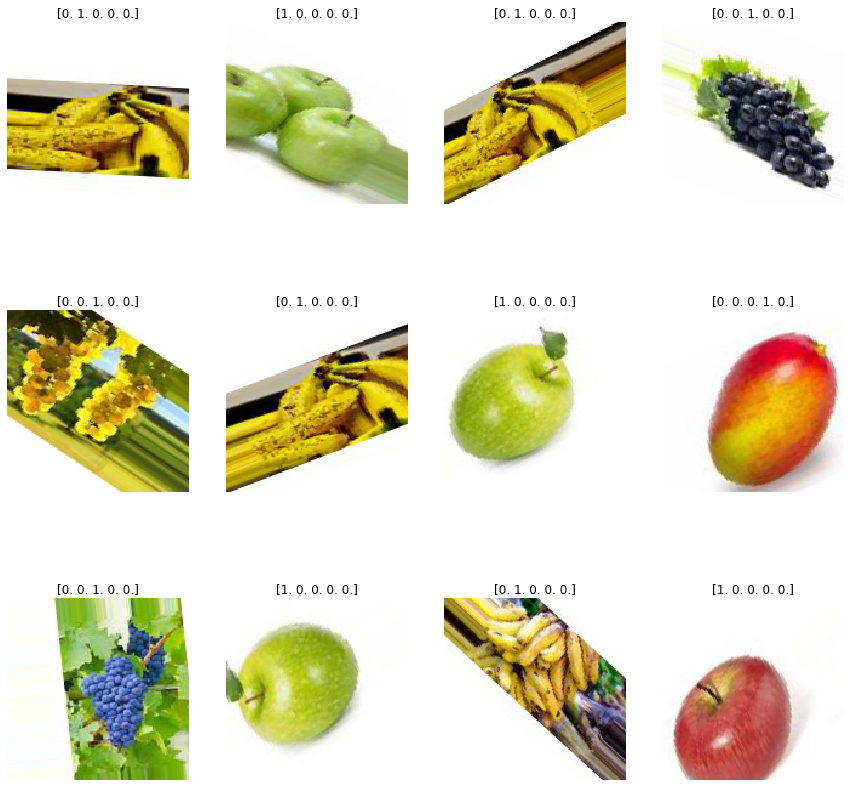

In [11]:
import random
import matplotlib.pylab as plt

plt.figure(figsize=[15,15])
for i in range(12):
    x, y = random.choice(train_generator)
    plt.subplot(3, 4, i+1)
    for im, lb in zip(x, y):
        plt.title(str(lb))
        plt.imshow(im)
        plt.axis('off')
plt.show()

In [12]:
train_generator.class_indices

{'apple': 0, 'banana': 1, 'grape': 2, 'mango': 3, 'orange': 4}

In [28]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
____

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [30]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(
    train_generator, 
    epochs= 25, 
    steps_per_epoch=20, 
    validation_data = validation_generator, 
    verbose = 1, 
    validation_steps=3
)

Epoch 1/25
20/20 [==============================] - 208s 10s/step - loss: 1.9726 - acc: 0.2334 - val_loss: 1.6040 - val_acc: 0.2090
Epoch 2/25
20/20 [==============================] - 197s 10s/step - loss: 1.5749 - acc: 0.2647 - val_loss: 1.5069 - val_acc: 0.2937
Epoch 3/25
20/20 [==============================] - 193s 10s/step - loss: 1.4805 - acc: 0.3438 - val_loss: 1.4141 - val_acc: 0.4127
Epoch 4/25
20/20 [==============================] - 201s 10s/step - loss: 1.4871 - acc: 0.3667 - val_loss: 1.2574 - val_acc: 0.4286
Epoch 5/25
20/20 [==============================] - 188s 9s/step - loss: 1.3769 - acc: 0.4113 - val_loss: 1.2422 - val_acc: 0.4418
Epoch 6/25
20/20 [==============================] - 208s 10s/step - loss: 1.2946 - acc: 0.4571 - val_loss: 1.1623 - val_acc: 0.4974
Epoch 7/25
20/20 [==============================] - 192s 10s/step - loss: 1.3037 - acc: 0.4767 - val_loss: 1.2938 - val_acc: 0.4259
Epoch 8/25
20/20 [==============================] - 191s 10s/step - loss: 1.1

In [31]:
# evaluate the model
loss, acc = model.evaluate(validation_generator)
print(f"valid accuracy: {acc*100}% \nvalid loss: {loss*100}%")

9/9 [==============================] - 35s 4s/step - loss: 0.8507 - acc: 0.6670
valid accuracy: 66.69838428497314% 
valid loss: 85.06553437974718%


## Conclusion

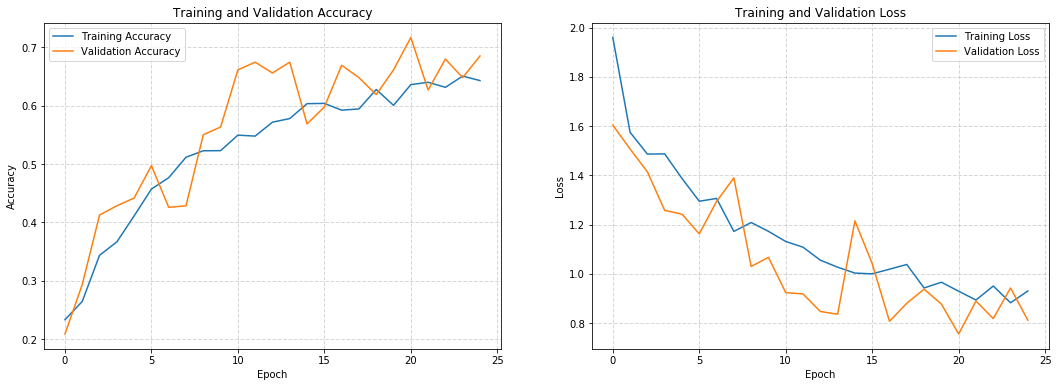

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)


plt.show()

## Save & Load Model

In [ ]:
os.mkdir('model')

In [37]:
# save Model

## to json
model_json = model.to_json()
with open("model/model.json", "w") as json_file:
    json_file.write(model_json)

## to h5
model.save("model/model.h5")
model.save_weights('model/model_weights.h5')
print('Model Saved!')

Model Saved!


In [13]:
# load model

## load json file
from tensorflow.keras.models import model_from_json 
json_file = open('model/model.json','r')
loaded_model_json = json_file.read()
json_file.close()
savedModelJSON = model_from_json(loaded_model_json)

## load h5 file
from tensorflow.keras.models import load_model
savedModel = load_model('model/model.h5')
savedModelWeight = savedModel.load_weights('model/model_weights.h5')
print('Model Loaded!')

savedModel.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model Loaded!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
__________________

In [14]:
## save labels
import json
with open("model/labels_map.json", "w") as json_file:
    json_file.write(json.dumps(train_generator.class_indices))

## Load labels
f = open('model/labels_map.json')
labels = json.load(f)

In [15]:
loss, acc = savedModel.evaluate(validation_generator)
loss, acc

9/9 [==============================] - 27s 3s/step - loss: 0.8490 - acc: 0.6670


(0.8490326537026299, 0.66698384)

# Predict

Probability:  0.66157365
Classified:  apple 



Text(0.5, 1.0, 'Loaded Image image/apple.jpg')

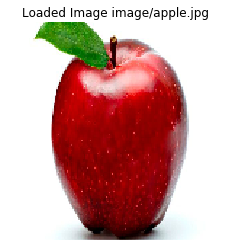

In [16]:
# predicting images load h5
import numpy as np
import keras_preprocessing
from keras_preprocessing import image
import matplotlib.pyplot as plt

path = 'image/apple.jpg'
img = image.load_img(path, target_size=(150, 150))
# class_names = list(train_generator.class_indices.keys())
class_names = list(labels.keys())

x = image.img_to_array(img)
x = np.array(x)/255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
pred = savedModel.predict(images)

print("Probability: ",np.max(pred[0], axis=-1))
predicted_class = class_names[np.argmax(pred[0], axis=-1)]
print("Classified: ",predicted_class,'\n')

plt.axis('off')
plt.imshow(images.squeeze())
plt.title(f"Loaded Image {path}")

# Upload Model to GCS

In [ ]:
# GS Authentification
from google.colab import auth
project_id = 'capstone-praject-b21-cap0293'
auth.authenticate_user(project_id)
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://cap-out/
gs://cap-upload/
gs://capstone-praject-b21-cap0293.appspot.com/
gs://capstone_b21-cap0293/
gs://gcf-sources-1032992857684-us-east1/
gs://staging.capstone-praject-b21-cap0293.appspot.com/
gs://us.artifacts.capstone-praject-b21-cap0293.appspot.com/


In [ ]:
# Upload file to GS
!gsutil cp -r model.h5 gs://capstone_b21-cap0293/deploy/ML

Copying file://rps.h5 [Content-Type=application/octet-stream]...
\
Operation completed over 1 objects/26.6 MiB.                                     
